In [1]:
import pandas as pd
import numpy as np

pd.plotting.register_matplotlib_converters()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Read the data
X_train_full = pd.read_csv('/kaggle/input/ibm-watson-marketing-customer-value-data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

X_train_full.head().T

,0,1,2,3,4
Customer,BU79786,QZ44356,AI49188,WW63253,HB64268
State,Washington,Arizona,Nevada,California,Washington
Customer Lifetime Value,2763.519279,6979.535903,12887.43165,7645.861827,2813.692575
Response,No,No,No,No,No
Coverage,Basic,Extended,Premium,Basic,Basic
Education,Bachelor,Bachelor,Bachelor,Bachelor,Bachelor
Effective To Date,2/24/11,1/31/11,2/19/11,1/20/11,2/3/11
EmploymentStatus,Employed,Unemployed,Employed,Unemployed,Employed
Gender,F,F,F,M,M
Income,56274,0,48767,0,43836


In [2]:
# Агрегируем данные по датафрейму в одну таблицу
features_data = pd.DataFrame(index=X_train_full.columns)

# Корреляция с таргетом
train_corr = X_train_full.corr()
features_data['Customer Lifetime Value Cor'] = train_corr['Customer Lifetime Value']
# Тип данных
features_data['Type'] = X_train_full.dtypes
# Пропущенные данные
features_data['NaN'] = X_train_full.isna().sum()
features_data['NaN percent'] = (X_train_full.isna().sum() / X_train_full.shape[0]) * 100
# Уникальные значения
features_data['Unique'] = pd.DataFrame([len(X_train_full[item].unique()) for item in X_train_full.columns], index=features_data.index) 
# Статистика
quantiles = [0.05, 0.50, 0.95]
features_train_desc = X_train_full.describe(quantiles).T
features_data = features_data.join(features_train_desc, how='left')

features_data.drop('Customer Lifetime Value', axis=0, inplace=True)
features_data

,Customer Lifetime Value Cor,Type,NaN,NaN percent,Unique,count,mean,std,min,5%,50%,95%,max
Customer,NaN,object,0,0.0,9134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,NaN,object,0,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Response,NaN,object,0,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Coverage,NaN,object,0,0.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,NaN,object,0,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Effective To Date,NaN,object,0,0.0,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmploymentStatus,NaN,object,0,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,NaN,object,0,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,0.024366,int64,0,0.0,5694,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,90374.350000,99981.000000
Location Code,NaN,object,0,0.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Пропусков в данных нет - одной головной болью меньше.
Имеем несколько цифровых признаков, два из них имееют сносную кореляцию с целнвой переменной.
Есть ряж котегориальных признаков, с количеством уникадбных значений меньше 10. Можно было бы пропустить их через OHE, но это выходит за рамки данного задания. К тому же есть ощущение, что бустерные модели в целом переваривают LabelEncoding также хорошо, как OHE.
Есть пара категориальных признаков с большим количеством уникальных значений, посмотрим далее что с ними можно сделать.

<AxesSubplot:xlabel='CLV Log'>

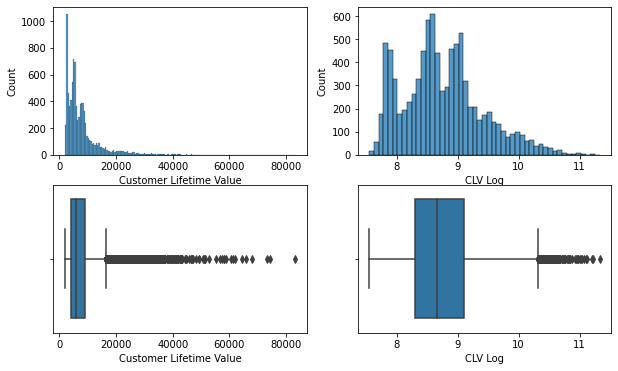

In [3]:
# Исследуем целевую переменную (а потом ещё и логарифм)
X_train_full['CLV Log'] = np.log1p(X_train_full['Customer Lifetime Value'])

fig, axes = plt.subplots(nrows=2, ncols=2,  figsize=(10,6))
sns.histplot(x='Customer Lifetime Value', data=X_train_full, ax=axes[0][0])
sns.boxplot(x='Customer Lifetime Value', data=X_train_full, ax=axes[1][0])
sns.histplot(x='CLV Log', data=X_train_full, ax=axes[0][1])
sns.boxplot(x='CLV Log', data=X_train_full, ax=axes[1][1])


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


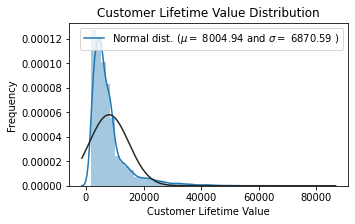

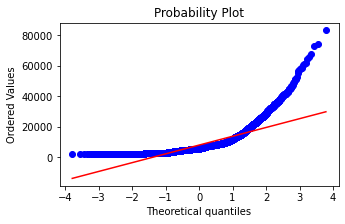

In [4]:
from scipy import stats
from scipy.stats import norm
plt.figure(figsize=(5,3))
sns.distplot(X_train_full['Customer Lifetime Value'], fit=norm)

# фитим распределение
(mu, sigma) = norm.fit(X_train_full['Customer Lifetime Value'])

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Customer Lifetime Value Distribution')

plt.figure(figsize=(5,3))
stats.probplot(X_train_full['Customer Lifetime Value'], plot=plt)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


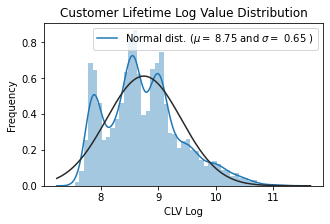

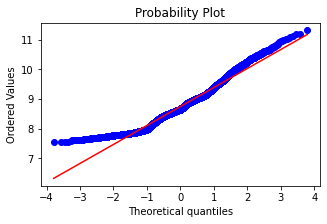

In [5]:
from scipy import stats
from scipy.stats import norm
plt.figure(figsize=(5,3))
sns.distplot(X_train_full['CLV Log'], fit=norm)

# фитим распределение
(mu, sigma) = norm.fit(X_train_full['CLV Log'])

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Customer Lifetime Log Value Distribution')

plt.figure(figsize=(5,3))
stats.probplot(X_train_full['CLV Log'], plot=plt)
plt.show()

В логарифме рапредение выглядит нормальней, я бы взял в качестве логарифмированную величину в качестве целевой для модели. Что-то наверное можно сделать с левым всплеском, но пока не знаю что)

<AxesSubplot:>

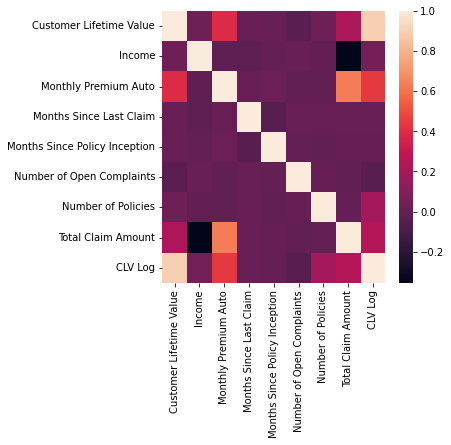

In [6]:
# Кореляция 
train_corr = X_train_full.corr()
plt.figure(figsize=(5,5))
sns.heatmap(train_corr)

Два признака, которые хорошо коррелируют с целевой переменной также сильно корелируют между собой. Это не очень хорошо, и в идеале бы посмотреть как модели буду работать с каждым из них поотдельности.

In [7]:

features_data_cat = features_data[features_data['Type'] == 'object']
categorical_col = list(features_data_cat[features_data_cat['Unique'] < 10].index.values)
multicategorical_col = list(features_data_cat[features_data_cat['Unique'] >= 10].index.values)
numerical_col = list(features_data[features_data['Type'] != 'object'].index.values)


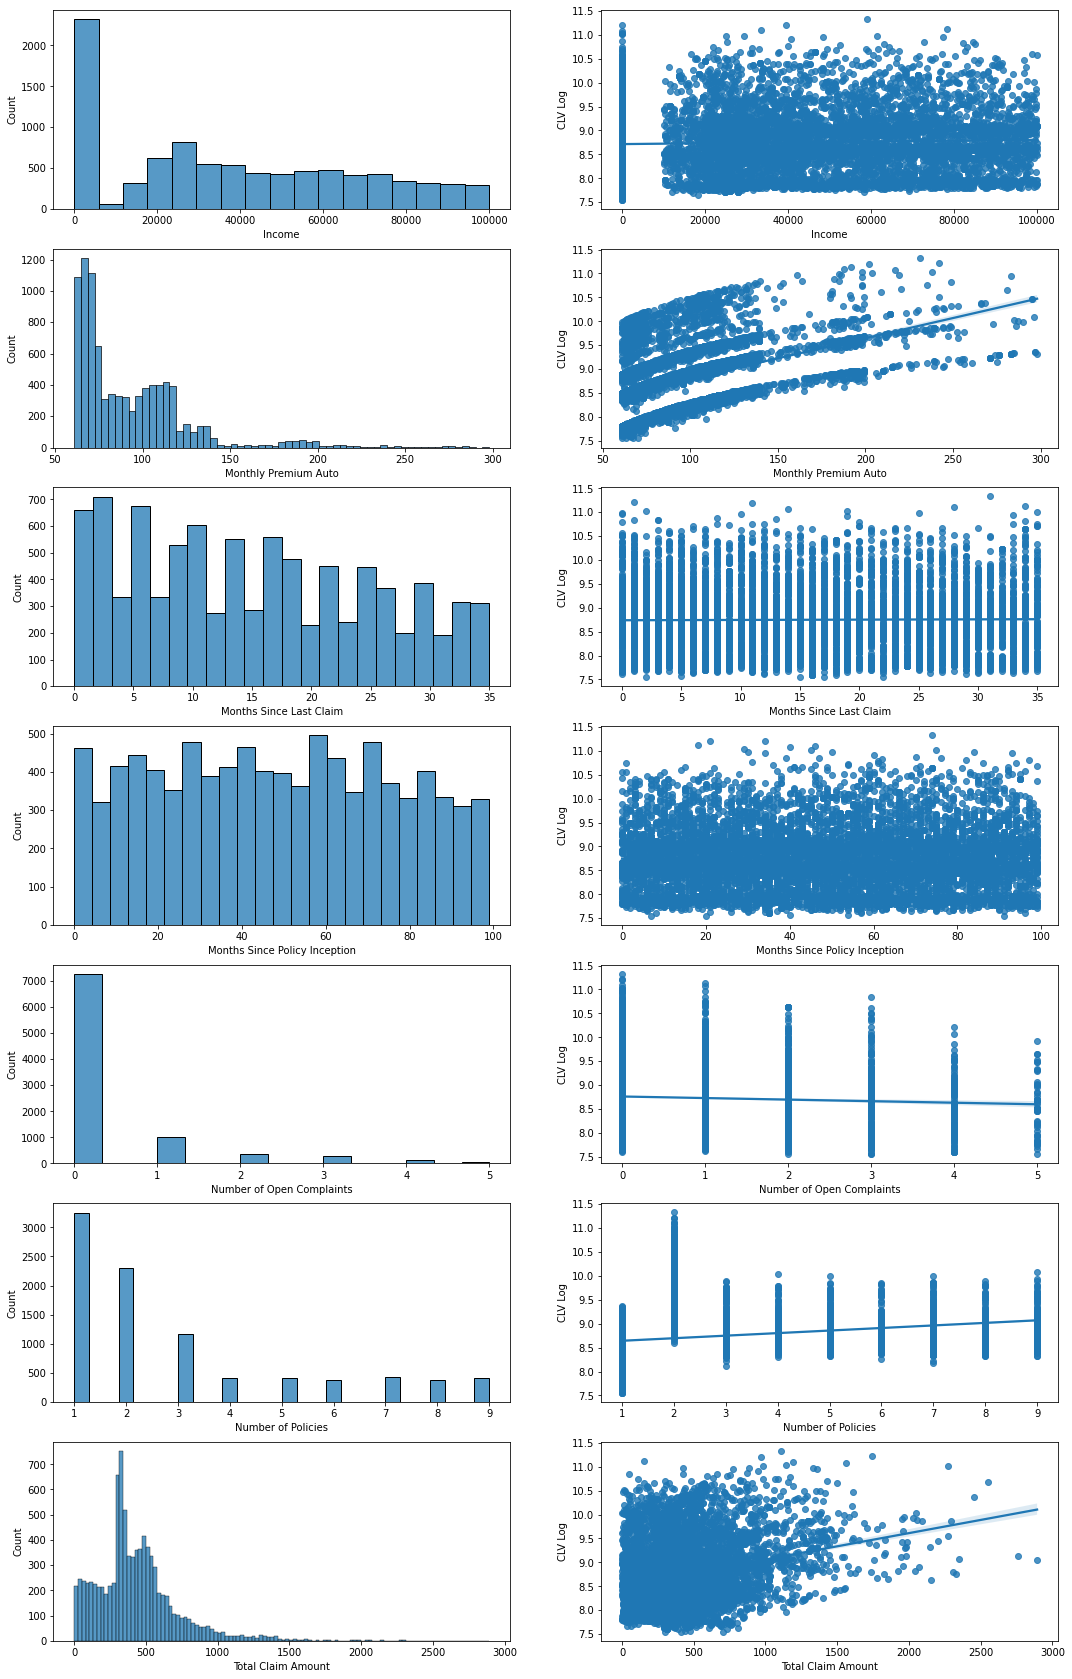

In [8]:
#X_train_full['CLV Log'] = np.log1p(X_train_full['Customer Lifetime Value'])
numerical_col_len = len(numerical_col)

fig, axes = plt.subplots(nrows=numerical_col_len, ncols=2,  figsize=(18,30))
for i in range(numerical_col_len):
    sns.histplot(x=numerical_col[i], data=X_train_full, ax=axes[i][0])
    sns.regplot(x=numerical_col[i], y='CLV Log', data=X_train_full, ax=axes[i][1])
    #sns.regplot(x=numerical_col[i], y='Customer Lifetime Value', data=X_train_full, ax=axes[i][2])
    

In [9]:
model_numerical_col = [
# 'Income', #useless
 'Monthly Premium Auto',               #useful
# 'Months Since Last Claim',        #useless
 'Months Since Policy Inception',  #useful
# 'Number of Open Complaints',             # useless
 'Number of Policies',             # useful
 'Total Claim Amount',             # useful
]

Не будем брать парметры, которые выглядят совсем бесполезными

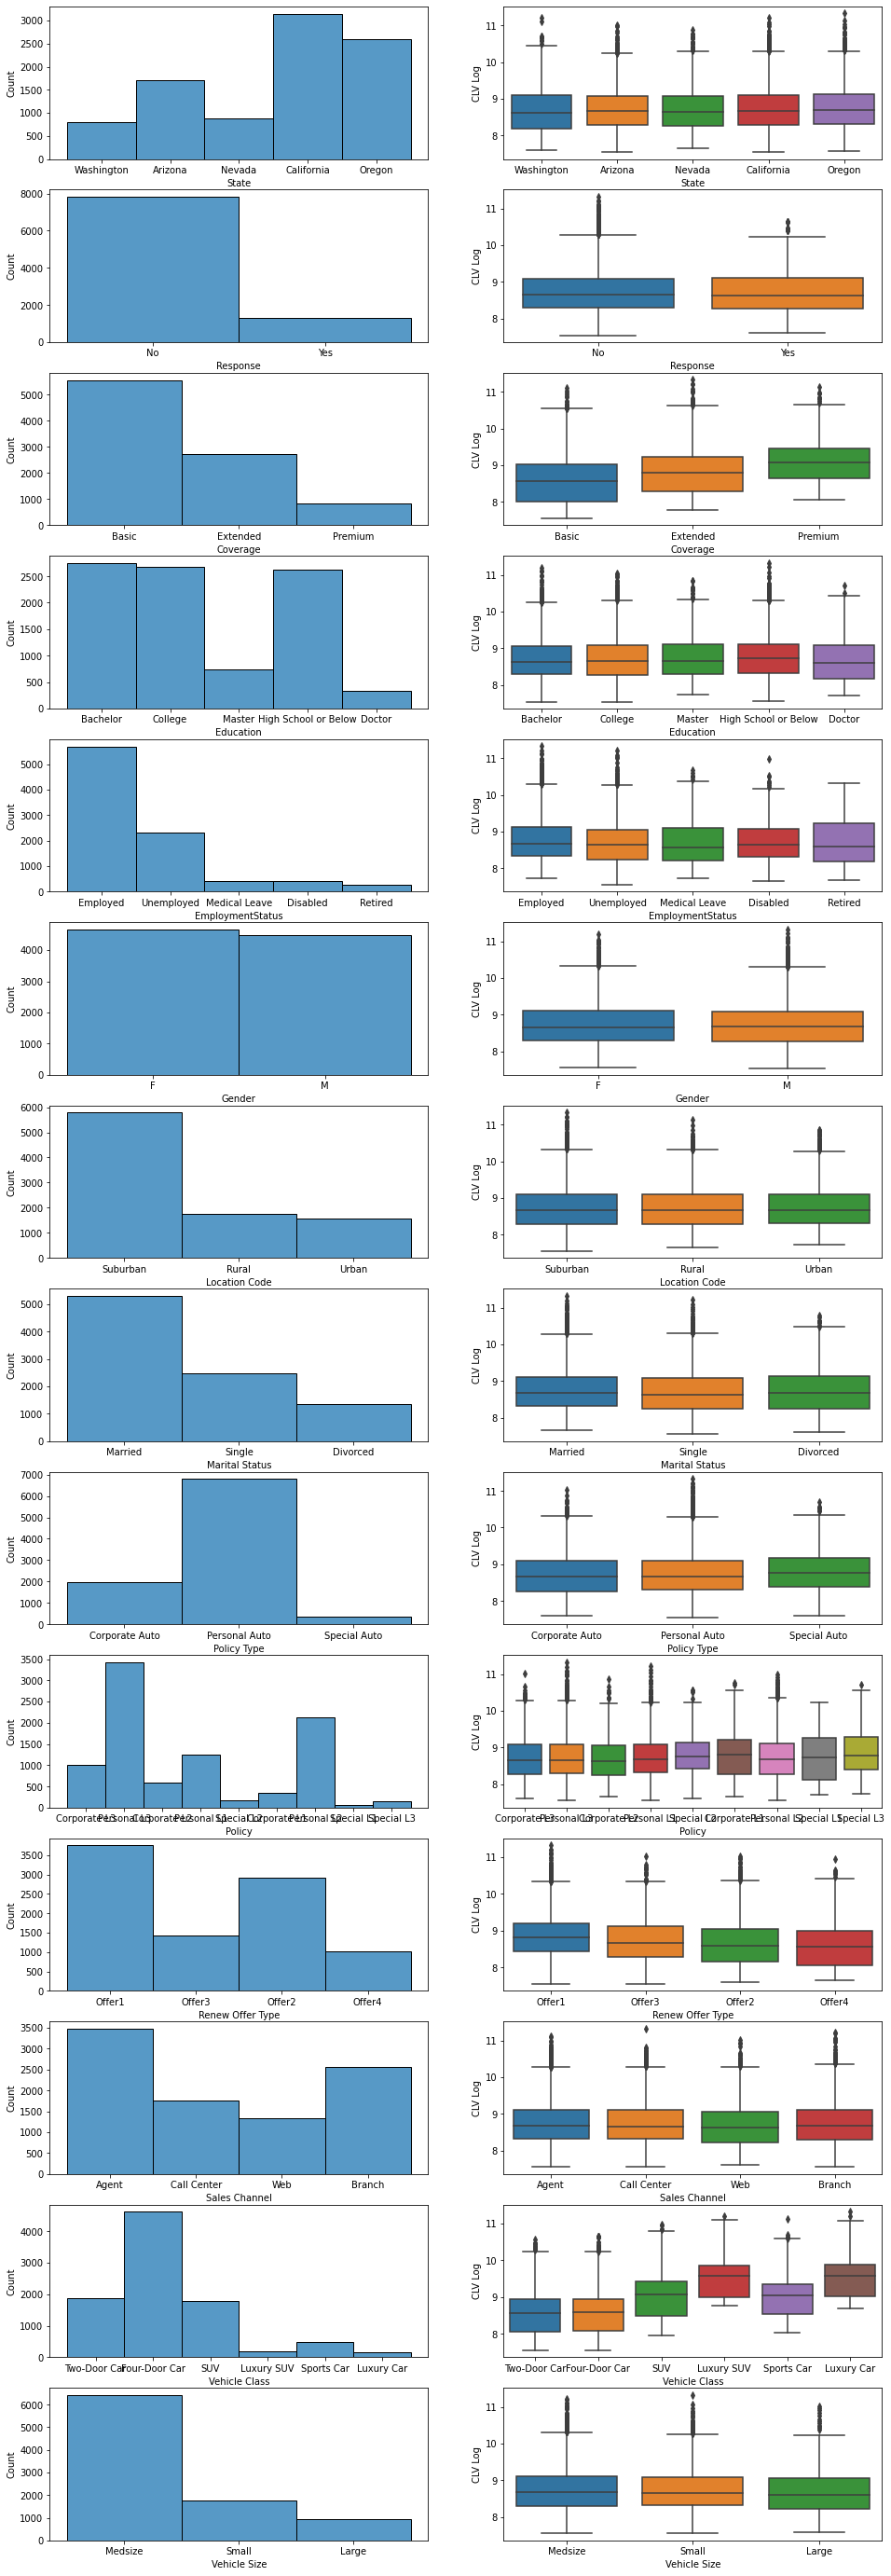

In [10]:
categorical_col_len = len(categorical_col)

fig, axes = plt.subplots(nrows=categorical_col_len, ncols=2,  figsize=(16,50))
for i in range(categorical_col_len):
    sns.histplot(x=categorical_col[i], data=X_train_full, ax=axes[i][0])
    sns.boxplot(x=categorical_col[i], y='CLV Log', data=X_train_full, ax=axes[i][1])
    #sns.boxplot(x=categorical_col[i], y='Customer Lifetime Value', data=X_train_full, ax=axes[i][2])

In [11]:
model_categorical_col = [
 #'State',
# 'Response',
 'Coverage',
 'Education', 
 'EmploymentStatus',
# 'Gender',
# 'Location Code',
# 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
# 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size'
]

In [12]:
X_train_full[multicategorical_col].T

,0,1,2,3,4,5,6,7,8,9,...,9124,9125,9126,9127,9128,9129,9130,9131,9132,9133
Customer,BU79786,QZ44356,AI49188,WW63253,HB64268,OC83172,XZ87318,CF85061,DY87989,BQ94931,...,CB59349,RX91025,AC13887,TF56202,YM19146,LA72316,PK87824,TD14365,UP19263,Y167826
Effective To Date,2/24/11,1/31/11,2/19/11,1/20/11,2/3/11,1/25/11,2/24/11,1/18/11,1/26/11,2/17/11,...,1/20/11,1/31/11,1/9/11,2/12/11,1/6/11,2/10/11,2/12/11,2/6/11,2/3/11,2/14/11


Поля Customer ничего поленого не несет. Посмотрим что можно извлечь из даты. Например посмотрим корреляцию с днем недели.

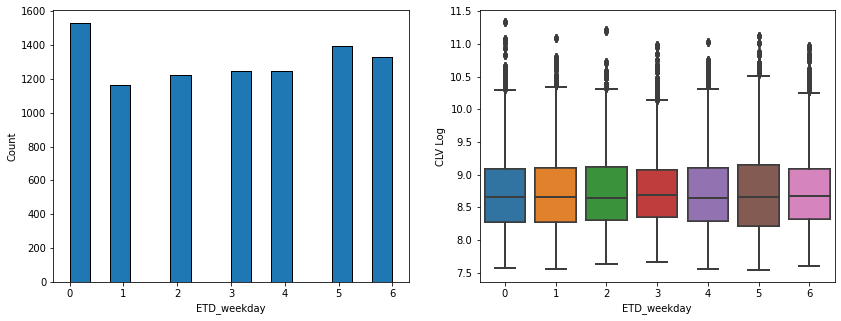

In [13]:
X_train_full['Effective To Date']
X_train_full['ETD_parsed'] = pd.to_datetime(X_train_full['Effective To Date'], format="%m/%d/%y")
#print(X_train_full['ETD_parsed'].dt.month.unique())
#print(X_train_full['ETD_parsed'].dt.weekday.unique())
X_train_full['ETD_weekday'] = X_train_full['ETD_parsed'].dt.weekday

fig, axes = plt.subplots(nrows=1, ncols=2,  figsize=(14,5))
for i in range(categorical_col_len):
    sns.histplot(x='ETD_weekday', data=X_train_full, ax=axes[0])
    sns.boxplot(x='ETD_weekday', y='CLV Log', data=X_train_full, ax=axes[1])

In [14]:
model_numerical_col.append('ETD_weekday')

'ETD_weekday' может быть полезным

In [15]:
#X_train_full = pd.get_dummies(X_train_full, columns=model_categorical_col, prefix_sep='=')
#X_train_full.shape

In [16]:
from sklearn.model_selection import train_test_split

all_cols = model_categorical_col + model_numerical_col


y_all = X_train_full['Customer Lifetime Value']
y_log_all = X_train_full['CLV Log']

X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_train_full, y_log_all, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=12)

X_train = X_train_full[all_cols].copy()
X_valid = X_valid_full[all_cols].copy()


print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(7307, 13) (1827, 13) (7307,) (1827,)


In [17]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

X_train[model_categorical_col] = enc.fit_transform(X_train[model_categorical_col])
X_valid[model_categorical_col] = enc.transform(X_valid[model_categorical_col])

X_valid[model_categorical_col].head(10).T

,5260,3995,7495,5610,2061,6844,7062,3975,5228,1104
Coverage,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
Education,4.0,1.0,0.0,3.0,1.0,3.0,0.0,0.0,0.0,3.0
EmploymentStatus,4.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0
Policy Type,2.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
Policy,7.0,5.0,5.0,5.0,2.0,2.0,5.0,5.0,3.0,4.0
Renew Offer Type,0.0,1.0,1.0,2.0,1.0,3.0,2.0,0.0,0.0,1.0
Vehicle Class,3.0,5.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
Vehicle Size,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0


  Model Name  Train set RMSE  Valid set RMSE
4         rf        0.073628        0.198663
3       lgbm        0.146145        0.199761
2   catboost        0.149691        0.202258
1        xgb        0.110141        0.207758
0    sklearn        0.197338        0.208254


<AxesSubplot:xlabel='Model Name', ylabel='Valid set RMSE'>

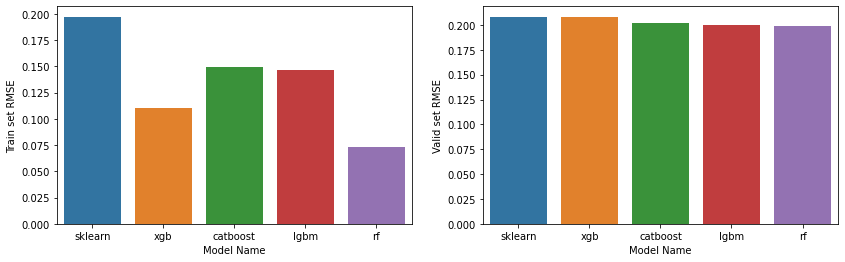

In [18]:

from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

n_estimators_val = 50

model_labels = [
    'sklearn',
    'xgb',
    'catboost',
    'lgbm',
    'rf'
]

model_list = [
    GradientBoostingRegressor(random_state=0),
    XGBRegressor(seed=0),
    CatBoostRegressor(random_seed=0),
    LGBMRegressor(random_seed=0),
    RandomForestRegressor(random_state=0)
]


predictions_train_list = []
predictions_valid_list = []
metrics_train_list = []
metrics_valid_list = []

#X_train.shape, X_valid.shape, y_train.shape, y_valid.shape
for i, model in enumerate(model_list):
    # У catboost по умолчанию включен verbose. Выключем его.
    if (model_labels[i] == 'catboost'): model.fit(X_train,y_train, verbose=0)
    else: model.fit(X_train,y_train)
        
    pred_test = model.predict(X_train)
    predictions_train_list.append(pred_test)
    pred_valid = model.predict(X_valid)
    predictions_valid_list.append(pred_valid)
    
    rmse_train = mean_squared_error(pred_test, y_train, squared=False)
    metrics_train_list.append(rmse_train)
    rmse_valid = mean_squared_error(pred_valid, y_valid, squared=False)
    metrics_valid_list.append(rmse_valid)
    #print(model_labels[i],'Train set RMSE =', rmse_train,'Valid set RMSE =', rmse_valid)   
    
ans = pd.DataFrame(model_labels, columns=['Model Name'])
ans['Train set RMSE'] = metrics_train_list
ans['Valid set RMSE'] = metrics_valid_list
print(ans.sort_values('Valid set RMSE'))
fig, axes = plt.subplots(nrows=1, ncols=2,  figsize=(14,4))
sns.barplot(x='Model Name', y='Train set RMSE', data=ans, ax=axes[0])
sns.barplot(x='Model Name', y='Valid set RMSE', data=ans, ax=axes[1])

При проверке моделей с гиперпараметрами по умолчанию лучший результат из бустерных моделей показал catboost и подтвердил репутацию. 
XGBoost занял последнее место. Исходя из того, что на трейне ошибка в два раза ниже, предположу, что он переобучился больше всех.

При этом добавленный для сравнения RandomForest показал даже чуть лучший результат, несмотря на те же признаки переобучения на трейн сете.

Надо ещё признать, что все алгоритмы дали достаточно близкие результаты и, при изменении Random Statу, меняются и места алгоритмов в рейтинге. Но спорт есть спорт, пока catboost лидирует.

0 sklearn
1 xgb
2 catboost
3 lgbm
4 rf


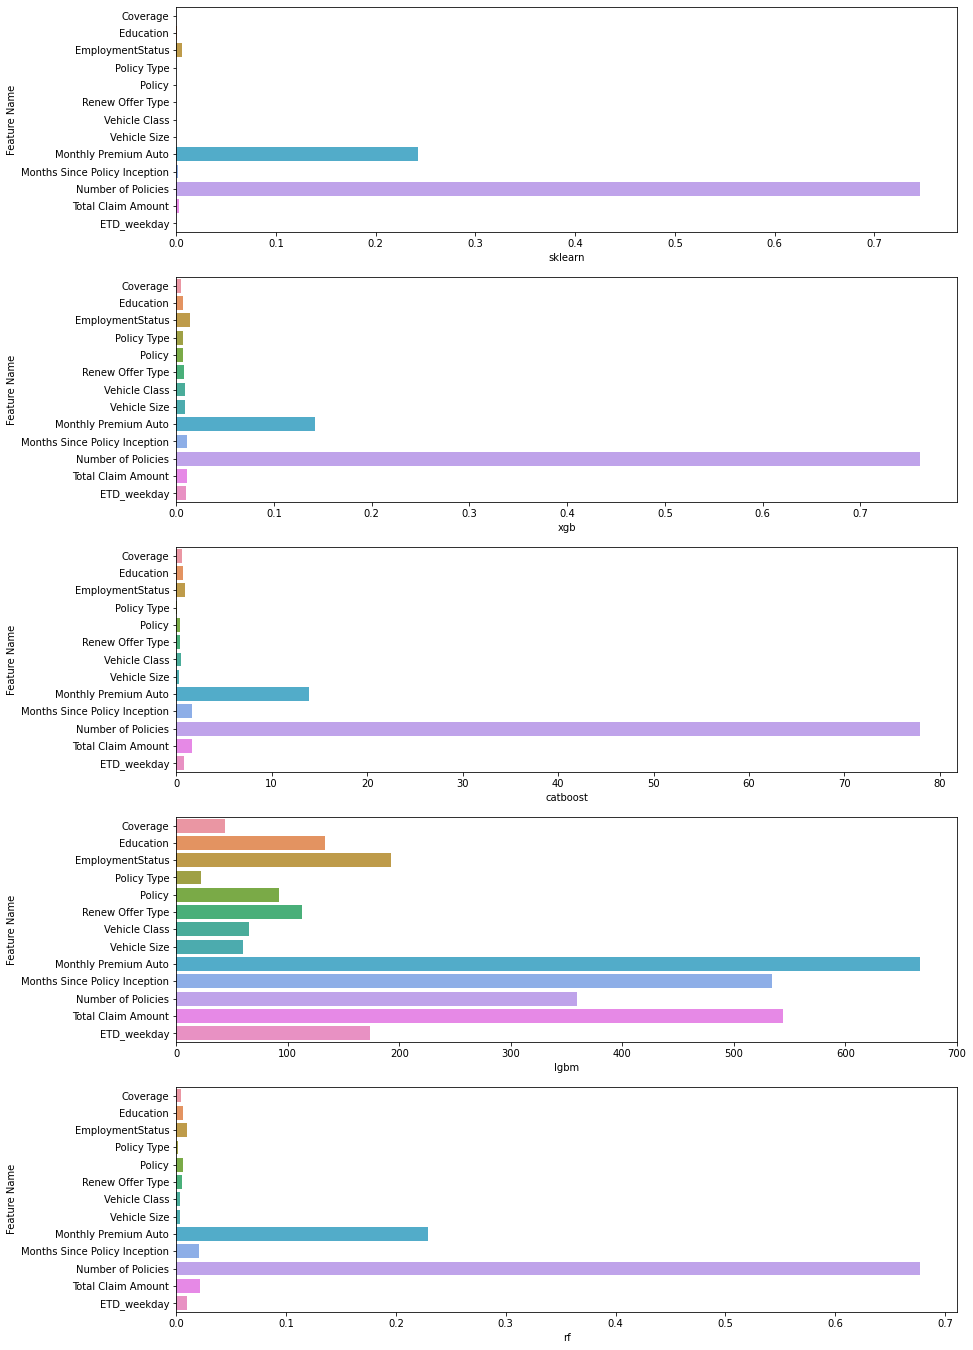

In [19]:
fi = pd.DataFrame(X_train.columns.values, columns=['Feature Name'])
for i, model in enumerate(model_list):
    fi[model_labels[i]] = model.feature_importances_
fig, axes = plt.subplots(nrows=5, ncols=1,  figsize=(14,24))
for i, label in enumerate(model_labels):
    print(i, label)
    sns.barplot(y='Feature Name', x=label, data=fi, ax=axes[i])

Факультативно посмотрим как различные модели оценили входные параметры. Большинство определило доминирующим Number of Policies. Только lgbm оценило выше Monthly Premium Auto, но мы ранее отмечали корреляцию этих признаков. Добавленный ETD_weekday не самы последний результат.

Теперь попробуем потюнить наши модели. В целом параметры для тюнинга модифицировались с той точки зрения, чтобы выбранный гридсечем гиперпараметр оказался где-нибудь в середине списка. Поэтому наборы гиперпараметров отличаются для разных моделей.

In [20]:
from sklearn.model_selection import GridSearchCV
import time

model_labels = [
    'sklearn',
    'xgb',
    'catboost',
    'lgbm',
]
model_list = [
    GradientBoostingRegressor(),
    XGBRegressor(),
    CatBoostRegressor(),
    LGBMRegressor(),
]

GradientBoostingRegressor_paramrters = {'n_estimators':  [40, 50, 80, 100, 120],
                                        'learning_rate':  [0.2, 0.18, 0.15, 0.1, 0.05],
                                        'max_depth': [2, 3, 4],
                                        'random_state': [2]}

XGBRegressorr_paramrters = {'n_estimators':  [50,70, 80,100,120],
                            'learning_rate': [0.2, 0.15, 0.1, 0.05],
                            'max_depth'    : [2, 3, 4],
                            'seed': [2]}

CatBoostRegressor_paramrters = {'n_estimators': [160,180, 200, 220, 250],
                               'learning_rate': [0.15, 0.1, 0.05],
                               'depth'    : [3, 4, 5],
                               'random_seed': [2]}

LGBMRegressor_paramrters = {'n_estimators':  [160, 180, 200, 220, 240, 260, 280],
                            'learning_rate': [0.15, 0.1, 0.05, 0.03] ,                             
                            'max_depth'    : [2, 3, 4, 5],
                            'random_seed': [2]}
paramrters_list = [
    GradientBoostingRegressor_paramrters,
    XGBRegressorr_paramrters,
    CatBoostRegressor_paramrters,
    LGBMRegressor_paramrters
]

best_parameters = []
predictions_train_list = []
predictions_valid_list = []
metrics_train_list = []
metrics_valid_list = []


for i, model in enumerate(model_list):
    ts = time.time()
    grid = GridSearchCV(model, param_grid=paramrters_list[i], cv=3, scoring='neg_root_mean_squared_error')
    
    # У catboost по умолчанию включен verbose. Выключем его, чтоб не засорять ноутбук
    if (model_labels[i] == 'catboost'): grid.fit(X_train,y_train, verbose=0)
    else: grid.fit(X_train,y_train)

    best_parameters.append(grid.best_params_)
    print(model_labels[i])
    print("Best params: ", grid.best_params_, "Best score:",  grid.best_score_)

    pred_test = grid.predict(X_train)
    predictions_train_list.append(pred_test)
    pred_valid = grid.predict(X_valid)
    predictions_valid_list.append(pred_valid)
    
    rmse_train = mean_squared_error(pred_test, y_train, squared=False)
    metrics_train_list.append(rmse_train)
    rmse_valid = mean_squared_error(pred_valid, y_valid, squared=False)
    metrics_valid_list.append(rmse_valid)
    print('Train set RMSE =', rmse_train,'Valid set RMSE =', rmse_valid)   
    print('Calculation time:', time.time() - ts, '\n')


sklearn
Best params:  {'learning_rate': 0.18, 'max_depth': 4, 'n_estimators': 80, 'random_state': 2} Best score: -0.20502392738393496
Train set RMSE = 0.18138975252397432 Valid set RMSE = 0.20629731426323367
Calculation time: 96.95592641830444 

xgb
Best params:  {'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 70, 'seed': 2} Best score: -0.2049074011902122
Train set RMSE = 0.18967601355388913 Valid set RMSE = 0.20693996169977213
Calculation time: 61.23487401008606 

catboost
Best params:  {'depth': 5, 'learning_rate': 0.1, 'n_estimators': 250, 'random_seed': 2} Best score: -0.2045050340605965
Train set RMSE = 0.18354236361786744 Valid set RMSE = 0.20523972303392998
Calculation time: 33.160327434539795 

lgbm
Best params:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 240, 'random_seed': 2} Best score: -0.2051040751130079
Train set RMSE = 0.19747229736472557 Valid set RMSE = 0.20838804445267542
Calculation time: 40.704498052597046 



Previous results
  Model Name  Train set RMSE  Valid set RMSE
4         rf        0.073628        0.198663
3       lgbm        0.146145        0.199761
2   catboost        0.149691        0.202258
1        xgb        0.110141        0.207758
0    sklearn        0.197338        0.208254

New results
  Model Name  Train set RMSE  Valid set RMSE
2   catboost        0.183542        0.205240
0    sklearn        0.181390        0.206297
1        xgb        0.189676        0.206940
3       lgbm        0.197472        0.208388


<AxesSubplot:xlabel='Model Name', ylabel='Valid set RMSE'>

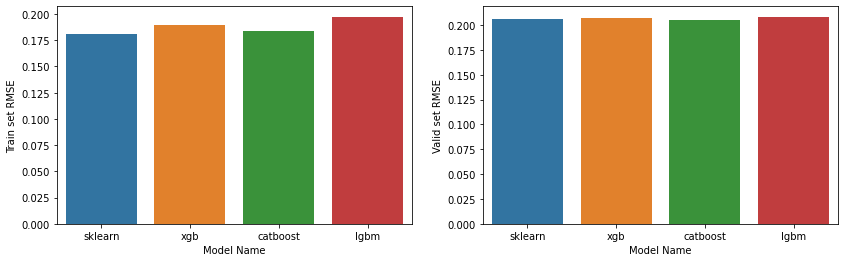

In [21]:
print('Previous results')
print(ans.sort_values('Valid set RMSE'))
print('\nNew results')
ans2 = pd.DataFrame(model_labels, columns=['Model Name'])
ans2['Train set RMSE'] = metrics_train_list
ans2['Valid set RMSE'] = metrics_valid_list
print(ans2.sort_values('Valid set RMSE'))
fig, axes = plt.subplots(nrows=1, ncols=2,  figsize=(14,4))
sns.barplot(x='Model Name', y='Train set RMSE', data=ans2, ax=axes[0])
sns.barplot(x='Model Name', y='Valid set RMSE', data=ans2, ax=axes[1])


Catboost остался впереди. XGB прорвался на второе место. Результататы на трейне можно интерпретировать, что переобучения у моделей если и есть то незначительное. Реадизация Sklearn оказалась позади и даже чуть ухудшила показатель (при этом его GridSearchCV best score не на много уступает lgbm).


Напоследок попробуем заблендить результаты наших моделей.

In [22]:
blend_ans = pd.DataFrame(predictions_valid_list).mean()
rmse_valid = mean_squared_error(blend_ans, y_valid, squared=False)
print('Joined four models prediction blend on valid set RMSE =', rmse_valid, '\n')   


Joined four models prediction blend on valid set RMSE = 0.2055411324882904 



Показатели не улучшились, но так бывает.

Напоследок проверим ещё одну гипотизу: что лучше, подбирать n_estimators с помощью GridSearchCV или испоользовать overfitting detector? 

In [23]:
X_valid_, X_test, y_valid_, y_test = train_test_split(X_valid, y_valid, 
                                                                train_size=0.5, 
                                                                random_state=10)

model_1 = CatBoostRegressor(depth=3, learning_rate=0.05, random_seed=0, n_estimators=180)
model_2 = CatBoostRegressor(depth=3, learning_rate=0.05, random_seed=0, early_stopping_rounds=10, n_estimators=1000)

model_1.fit(X_train,y_train, verbose=10)
model_2.fit(X_train,y_train, eval_set=(X_valid_, y_valid_), verbose=10)

pred_test_1 = model_1.predict(X_test)
rmse_valid_1 = mean_squared_error(pred_test_1, y_test, squared=False)

pred_test_2 = model_2.predict(X_test)
rmse_valid_2 = mean_squared_error(pred_test_2, y_test, squared=False)

print('Best parameters RMSE =', rmse_valid_1,'\nValid set usage RMSE =', rmse_valid_2)   

0:	learn: 0.6250479	total: 1.65ms	remaining: 295ms
10:	learn: 0.4294672	total: 15.3ms	remaining: 235ms
20:	learn: 0.3248925	total: 27.7ms	remaining: 210ms
30:	learn: 0.2702467	total: 40.7ms	remaining: 196ms
40:	learn: 0.2418368	total: 53.1ms	remaining: 180ms
50:	learn: 0.2274299	total: 65ms	remaining: 164ms
60:	learn: 0.2193441	total: 76.8ms	remaining: 150ms
70:	learn: 0.2142412	total: 88.9ms	remaining: 137ms
80:	learn: 0.2111873	total: 101ms	remaining: 123ms
90:	learn: 0.2091169	total: 116ms	remaining: 114ms
100:	learn: 0.2079499	total: 128ms	remaining: 100ms
110:	learn: 0.2071015	total: 140ms	remaining: 87.2ms
120:	learn: 0.2063865	total: 152ms	remaining: 74.1ms
130:	learn: 0.2058856	total: 164ms	remaining: 61.3ms
140:	learn: 0.2054329	total: 176ms	remaining: 48.7ms
150:	learn: 0.2049908	total: 188ms	remaining: 36.1ms
160:	learn: 0.2046585	total: 201ms	remaining: 23.7ms
170:	learn: 0.2043016	total: 213ms	remaining: 11.2ms
179:	learn: 0.2039422	total: 224ms	remaining: 0us
0:	learn: 0.

Первый метод подбедил. Видимо сказывается использование нескольких выборок в GridSearchCV. Его показатели точнее. 